In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib import rc

import infcic

rcParams['mathtext.default']='regular'
plt.rc('font', family='serif', )
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

### Get P(N) for random data.

In [3]:
import random
density = 200
length = 5
points = np.random.uniform(0, length, size = (density * length**2, 2))

widths = np.power(10,(np.linspace(-2,0,15)))

In [4]:
Pnk = infcic.infcic(points, widths)

doing cell 1 of 15 ... (0.010 deg)
doing cell 2 of 15 ... (0.014 deg)
doing cell 3 of 15 ... (0.019 deg)
doing cell 4 of 15 ... (0.027 deg)
doing cell 5 of 15 ... (0.037 deg)
doing cell 6 of 15 ... (0.052 deg)
doing cell 7 of 15 ... (0.072 deg)
doing cell 8 of 15 ... (0.100 deg)
doing cell 9 of 15 ... (0.139 deg)
doing cell 10 of 15 ... (0.193 deg)
doing cell 11 of 15 ... (0.268 deg)
doing cell 12 of 15 ... (0.373 deg)
doing cell 13 of 15 ... (0.518 deg)
doing cell 14 of 15 ... (0.720 deg)
doing cell 15 of 15 ... (1.000 deg)


### Calculate first three factorial moments and corresponding cumulants. 

In [5]:
nlen, klen = np.shape(Pnk)
ns = np.arange(nlen)

F1, F2, F3 = np.zeros(klen), np.zeros(klen), np.zeros(klen)
for k in range(klen):
    width = widths[k]
    F1[k] = (Pnk[:,k] * ns).sum()                            # mean
    F2[k] = (Pnk[:,k] * ns * (ns - 1)).sum()                 # second (factorial) moment
    F3[k] = (Pnk[:,k] * ns * (ns - 1) * (ns - 2)).sum()      # third (factorial) moment
    
nbar = F1
wbar = F2 / F1**2 - 1.0
Q3 = F1 * (F3 - 3*F1*F2 + 2*F1**3) / (3 * (F2 - F1**2)**2)

### Plot P(N) for each scale. As expected, probability distributions peak at density * cell_area.

Text(0, 0.5, 'P(N)')

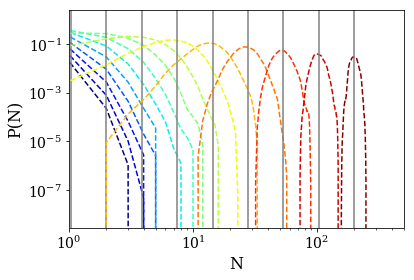

In [6]:
colors = matplotlib.cm.jet(np.linspace(0,1,klen))

for i in range(klen):
    plt.loglog(ns, Pnk[:,i], '--', color=colors[i])
    plt.axvline(density * widths[i]**2, color='gray')
plt.xlim([1,500])
plt.xlabel('N',fontsize=16)
plt.ylabel('P(N)',fontsize=16)

### Plot first three cumulants.

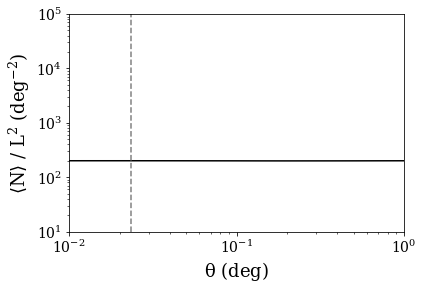

In [7]:
plt.loglog(widths, nbar / widths ** 2, color='k')

plt.ylabel(r"$\langle N \rangle \ / \ L^2$ (deg$^{-2}$)",fontsize=18)
plt.xlabel(r"$\theta$ $(deg)$",fontsize=18)

plt.xlim([min(widths),max(widths)])
plt.ylim([10,100000])

plt.axvline(x=0.0233,linestyle='--',color='gray')    # DESI fiber patrol radius

Text(0.5, 0, '$\\theta$ $(deg)$')

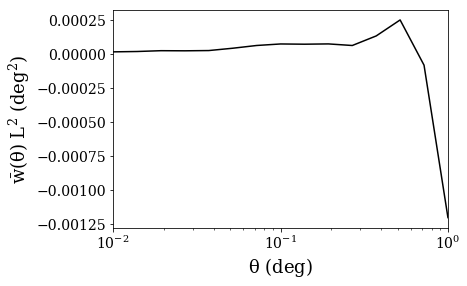

In [8]:
plt.semilogx(widths, wbar * widths ** 2,color='k')
plt.ylabel(r"$\bar{w}(\theta) \ L^2 \ (deg^{2})$",fontsize=18)
plt.xlabel(r"$\theta$ $(deg)$",fontsize=18)
plt.xlim([min(widths),max(widths)])

(0.01, 1.0)

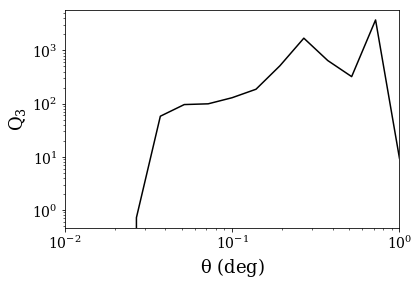

In [10]:
plt.loglog(widths, Q3, color='k')
plt.ylabel(r"$Q_3$",fontsize=18)
plt.xlabel(r"$\theta$ $(deg)$",fontsize=18)
plt.xlim([min(widths),max(widths)])